# 2. CNN Basic Model

# 소규모 데이터셋에서 컨브넷 모델 구축하기
* 매우 적은 데이터를 사용해 이미지 분류 모델을 훈련하는 일은 흔한 경우입니다. 여러분이 전문적인 컴퓨터 비전 작업을 한다면 실제로 이런 상황을 마주치게 될 가능성이 높습니다.
* 보통 '적은' 샘플이란 수백 개에서 수만 개 사이를 의미합니다.
* 실용적인 예제로 5,000개의 강아지와 고양이 사진(2,500개는 강아지, 2,500개는 고양이)으로 구성된 데이터셋에서 강아지와 고양이 이미지를 분류해 보겠습니다. 훈련을 위해 각각 1,500개의 사진을 사용하고 검증과 테스트에 각각 500개의 사진을 사용하겠습니다.
* 이제 1,500개의 훈련 이미지, 500개의 검증 이미지, 500개의 테스트 이미지가 준비되었습니다. 분할된 각 데이터는 클래마다 동일한 개수의 샘플을 포함합니다. 균형잡힌 이진 분류 문제이므로 정확도를 사용해 성공을 측정하겠습니다.

## 데이터 전처리하기

데이터는 네트워크에 주입되기 전에 부동 소수 타입의 텐서로 적절하게 전처리되어 있어야 합니다. 지금은 데이터가 JPEG 파일로 되어 있으므로 네트워크에 주입하려면 대략 다음 과정을 따릅니다.

1.	사진 파일을 읽습니다.
2.	JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩합니다.
3.	그다음 부동 소수 타입의 텐서로 변환합니다.
4.	픽셀 값(0에서 255 사이)의 스케일을 [0, 1] 사이로 조정합니다(신경망은 작은 입력 값을 선호합니다).

In [ ]:
test = 1

def colab_wait():
  import time
  i = 0
  while 1:
    time.sleep(1)
    i += 1
    if i%120 == 0:
      print("loop_", i, 'Secs')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# google drive copy or link :  : test_data, training_data, validation_data
!rm -rf training_data validation_data test_data
# !ln -s '/content/drive/My Drive/lab-model/ch03/training_data' training_data
# !ln -s '/content/drive/My Drive/lab-model/ch03/validation_data' validation_data
# !ln -s '/content/drive/My Drive/lab-model/ch03/test_data' test_data

# 36분 소요됨
!cp -r '/content/drive/My Drive/lab-model/ch03/training_data' training_data
!cp -r '/content/drive/My Drive/lab-model/ch03/validation_data' validation_data
!cp -r '/content/drive/My Drive/lab-model/ch03/test_data' test_data
!ls -l

total 180
drwx------ 4 root root  4096 Jul  4 13:00 drive
drwxr-xr-x 1 root root  4096 Jun 26 16:26 sample_data
drwx------ 2 root root 36864 Jul  4 13:19 test_data
drwx------ 2 root root 90112 Jul  4 13:12 training_data
drwx------ 2 root root 36864 Jul  4 13:16 validation_data


In [ ]:
%matplotlib inline

# tensorflow 1.x 사용 지정
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import glob  # 파일 목록 처리 패키지, 파일 내용 처리 패키지 : pickle 
import numpy as np
import matplotlib.pyplot as plt
# import  load_img, img_to_array, array_to_img, ImageDataGenerator
...............

In [ ]:
%%time
if test:
  IMG_DIM = (150, 150)

  train_files = glob.glob('training_data/*')
  # img 파일 로딩 후 img -> array 변환하여 저장
  train_imgs = [ ............ for img in train_files]

  print(type(train_imgs), len(train_imgs))

<class 'list'> 3000
CPU times: user 6.81 s, sys: 472 ms, total: 7.28 s
Wall time: 7.31 s


In [ ]:
if test:
  train_imgs = np.array(train_imgs)

  print(type(train_imgs))
  print(train_imgs.shape, train_imgs.dtype)

<class 'numpy.ndarray'>
(3000, 150, 150, 3) float32


In [ ]:
if test:
  tmp = [fn for fn in train_files]
  print(tmp[:2])
  print(tmp[0].split('/')[1])
  print(tmp[0].split('/')[1].split('.'))

['training_data/cat.10267.jpg', 'training_data/dog.4835.jpg']
cat.10267.jpg
['cat', '10267', 'jpg']


In [ ]:
if test:
  train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]
  print(len(train_labels), train_labels[:3], train_labels[1500:1503])

3000 ['cat', 'dog', 'cat'] ['cat', 'cat', 'cat']


In [ ]:
%%time
IMG_DIM = (150, 150)

if test:
  train_files = glob.glob('training_data/*')
  train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]  # list, len:3000
  train_imgs = np.array(train_imgs)  # ndarray, shape:(3000, 150, 150, 3)
  train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]  # for Linux
  # train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]  # for Windows
  print(train_labels[:3], train_labels[1500:1503])

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]  # for Linux
# validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]  # for Windows
print(validation_labels[:3], validation_labels[500:503])

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

['cat', 'dog', 'cat'] ['cat', 'cat', 'cat']
['cat', 'dog', 'cat'] ['cat', 'cat', 'cat']
Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)
CPU times: user 9.42 s, sys: 2.08 s, total: 11.5 s
Wall time: 11.5 s


In [ ]:
if test:
  print(type(train_imgs[0]), train_imgs[0].shape, train_imgs[0][0][:3])
  array_to_img(train_imgs[0])

<class 'numpy.ndarray'> (150, 150, 3) [[88. 78. 87.]
 [90. 79. 87.]
 [88. 75. 82.]]


In [ ]:
# train_imgs/validation_imgs 데이터 타입을 float32로 변경함
train_imgs_scaled = train_imgs.______('float32')
validation_imgs_scaled  = validation_imgs._____('float32')

# train_imgs_scaled/validation_imgs_scaled 데이터를 0~1 값으로 정규화함
train_imgs_scaled /= ___
validation_imgs_scaled /= ___

<class 'numpy.ndarray'> (150, 150, 3) [[0.34509805 0.30588236 0.34117648]
 [0.3529412  0.30980393 0.34117648]
 [0.34509805 0.29411766 0.32156864]]


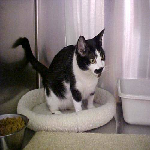

In [ ]:
print(type(train_imgs[0]), train_imgs[0].shape, train_imgs_scaled[0][0][:3])
array_to_img(train_imgs_scaled[0])

In [ ]:
# 3000/32 = 93.75,   3000/30 = 100
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import ________

le = ________
le.___(train_labels)
train_labels_enc = le.________(train_labels)
validation_labels_enc = le.________(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog'] [1 0 0 0 1 0 0 0 0 1]


## 네트워크 구성하기
* `Conv2D`(`relu` 활성화 함수 사용)와 `MaxPooling2D` 층을 번갈아 쌓은 컨브넷을 만들겠습니다.
* CONV(F:3x3, 16) -> POOL(2x2) -> CONV(F3x3, 64) -> POOL(2x2) -> CONV(F3x3, 128) -> POOL(2x2) -> CONV(F3x3, 128) -> POOL(2x2) -> Flatten -> DENSE(512) -> DENSE(512) ->  OUTPUT

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()

In [ ]:


............





#loss:binary_crossentropy,optimizer:RMSprop, metrics:accuracy



........

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d

## 모델 훈련

In [ ]:
# colab:4~5분 소요됨, local: 60분 가량 소요됨
history = ..........




Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 8s 3ms/sample - loss: 0.8112 - acc: 0.5207 - val_loss: 0.7015 - val_acc: 0.5000
Epoch 2/30
3000/3000 [==============================] - 2s 609us/sample - loss: 0.6986 - acc: 0.5403 - val_loss: 0.7219 - val_acc: 0.5250
Epoch 3/30
3000/3000 [==============================] - 2s 617us/sample - loss: 0.6560 - acc: 0.6290 - val_loss: 0.6506 - val_acc: 0.6080
Epoch 4/30
3000/3000 [==============================] - 2s 623us/sample - loss: 0.6102 - acc: 0.6810 - val_loss: 0.6382 - val_acc: 0.6570
Epoch 5/30
3000/3000 [==============================] - 2s 619us/sample - loss: 0.5688 - acc: 0.7193 - val_loss: 0.6173 - val_acc: 0.6660
Epoch 6/30
3000/3000 [==============================] - 2s 618us/sample - loss: 0.5200 - acc: 0.7583 - val_loss: 0.5850 - val_acc: 0.6980
Epoch 7/30
3000/3000 [==============================] - 2s 623us/sample - loss: 0.4655 - acc: 0.7893 - val_loss: 0.5681 - val_

### 훈련 데이터와 검증 데이터에 대한 모델의 손실과 정확도를 그래프로 나타내 보겠습니다:

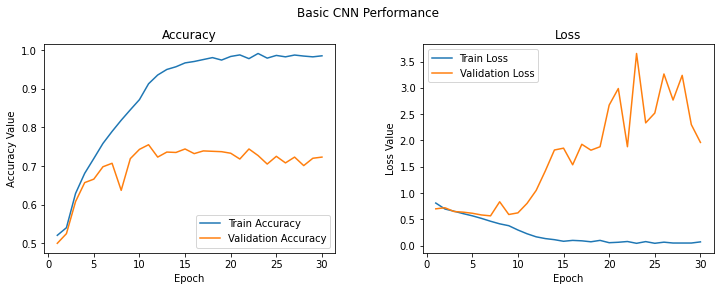

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

* 이 그래프는 과대적합의 특성을 보여줍니다. 훈련 정확도가 시간이 지남에 따라 선형적으로 증가해서 거의 100%에 도달합니다. 반면 검증 정확도는 70-72%에서 멈추었습니다. 검증 손실은 다섯 번의 에포크만에 최솟값에 다다른 이후에 더 이상 진전되지 않았습니다. 반면 훈련 손실은 거의 0에 도달할 때까지 선형적으로 계속 감소합니다.
* 비교적 훈련 샘플의 수(2,000개)가 적기 때문에 과대적합이 가장 중요한 문제입니다. 드롭아웃이나 가중치 감소(L2 규제) 및 데이터 증식과 같은 과대적합을 감소시킬 수 있는 여러 가지 기법들을 적용 해 볼 수 있습니다.

## 과적합 감소 : Drop-Out Regularization 기법을 적용
* CONV(F:3x3, 16) -> POOL(2x2) -> CONV(F3x3, 64) -> POOL(2x2) -> CONV(F3x3, 128) -> POOL(2x2) -> CONV(F3x3, 128) -> POOL(2x2) -> Flatten -> DENSE(512) -> DROP(0.3) -> DENSE(512) -> DROP(0.3) -> OUTPUT

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
..........
model.add(Dense(512, activation='relu'))
..........
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
# colab:3분, local:60분 정도 소요됨
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 2s 699us/sample - loss: 0.7750 - acc: 0.5043 - val_loss: 0.8619 - val_acc: 0.5000
Epoch 2/30
3000/3000 [==============================] - 2s 617us/sample - loss: 0.6843 - acc: 0.5693 - val_loss: 0.6793 - val_acc: 0.5760
Epoch 3/30
3000/3000 [==============================] - 2s 616us/sample - loss: 0.6681 - acc: 0.6263 - val_loss: 0.6280 - val_acc: 0.6500
Epoch 4/30
3000/3000 [==============================] - 2s 623us/sample - loss: 0.6137 - acc: 0.6700 - val_loss: 0.6161 - val_acc: 0.6580
Epoch 5/30
3000/3000 [==============================] - 2s 625us/sample - loss: 0.5641 - acc: 0.7163 - val_loss: 0.5956 - val_acc: 0.6900
Epoch 6/30
3000/3000 [==============================] - 2s 615us/sample - loss: 0.5282 - acc: 0.7493 - val_loss: 0.6458 - val_acc: 0.7000
Epoch 7/30
3000/3000 [==============================] - 2s 618us/sample - loss: 0.4785 - acc: 0.7793 - val_loss: 0.5434 - va

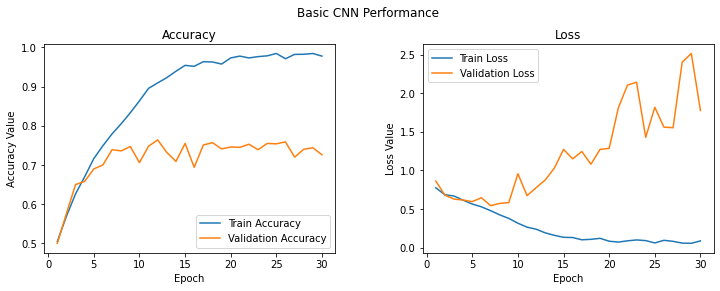

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
________('cats_dogs_basic_cnn.h5')

In [ ]:
!mv 'cats_dogs_basic_cnn.h5' '/content/drive/My Drive/lab-model'

# 3. CNN Image Augmentation

## 과적합 감소 - 데이터 증식(Data Augmentation) 사용하기

과대적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생합니다. 무한히 많은 데이터가 주어지면 데이터 분포의 모든 가능한 측면을 모델이 학습할 수 있을 것입니다. 데이터 증식은 기존의 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법입니다. 이 방법은 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘립니다. 훈련 시에 모델이 정확히 같은 데이터를 두 번 만나지 않도록 하는 것이 목표입니다. 모델이 데이터의 여러 측면을 학습하면 일반화에 도움이 될 것입니다.

케라스에서는 `ImageDataGenerator`가 읽은 이미지에 여러 종류의 랜덤 변환을 적용하도록 설정할 수 있습니다. 

In [ ]:
train_files = glob.glob('training_data/*')
train_files[:5]

In [ ]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)

train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files] # for linux
# train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files] # for windows

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files] # for linux
# validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files] # for windows

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5], train_labels[1500:1505], train_labels_enc[1500:1505])

### ImageDataGenerator
* rotation_range는 랜덤하게 사진을 회전시킬 각도 범위입니다(0-180 사이).
* width_shift_range와 height_shift_range는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위입니다(전체 넓이와 높이에 대한 비율).
* shear_range는 랜덤하게 전단 변환을 적용할 각도 범위입니다.
* zoom_range는 랜덤하게 사진을 확대할 범위입니다.
* horizontal_flip은 랜덤하게 이미지를 수평으로 뒤집습니다. 수평 대칭을 가정할 수 있을 때 사용합니다(예를 들어, 풍경/인물 사진).
* fill_mode는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략입니다.
* 추가적인 매개변수가 몇 개 더 있습니다(케라스 문서를 참고하세요). 

In [ ]:
from tensorflow.keras.preprocessing.image import ____________
train_datagen = _____________(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ___________(rescale=1./255)

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


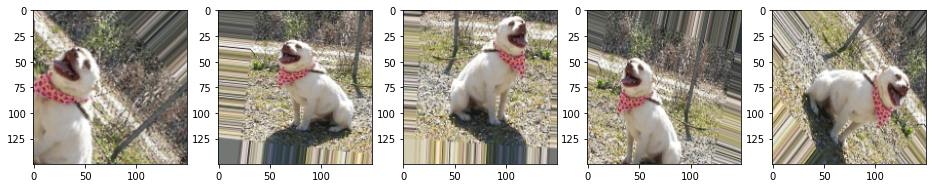

In [ ]:
img_id = 1     # 2595
cat_generator = train_datagen.____(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [____(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


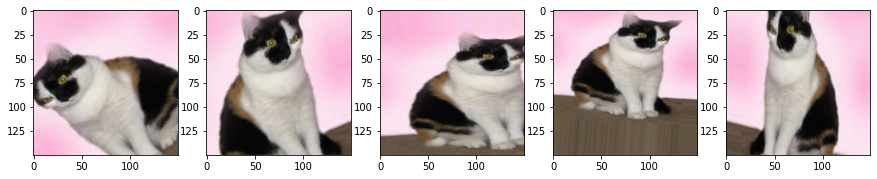

In [ ]:
img_id = 1501    # 1991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [ ]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

input_shape = (150, 150, 3)

### 데이터 증식과 드롭아웃을 사용한 네트워크 모델 설계 및 훈련

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
# 25분 정도 소요됨
%%time
history = ..........



Epoch 1/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6908 - acc: 0.5210 - val_loss: 0.6869 - val_acc: 0.5200
Epoch 2/100
100/100 [==============================] - 14s 140ms/step - loss: 0.6798 - acc: 0.5610 - val_loss: 0.6754 - val_acc: 0.5790
Epoch 3/100
100/100 [==============================] - 14s 141ms/step - loss: 0.6729 - acc: 0.5813 - val_loss: 0.6695 - val_acc: 0.5730
Epoch 4/100
100/100 [==============================] - 14s 139ms/step - loss: 0.6630 - acc: 0.6010 - val_loss: 0.6481 - val_acc: 0.6190
Epoch 5/100
100/100 [==============================] - 14s 141ms/step - loss: 0.6484 - acc: 0.6140 - val_loss: 0.6251 - val_acc: 0.6480
Epoch 6/100
100/100 [==============================] - 14s 142ms/step - loss: 0.6376 - acc: 0.6247 - val_loss: 0.6064 - val_acc: 0.6550
Epoch 7/100
100/100 [==============================] - 14s 142ms/step - loss: 0.6295 - acc: 0.6443 - val_loss: 0.6151 - val_acc: 0.6540
Epoch 8/100
100/100 [===========================

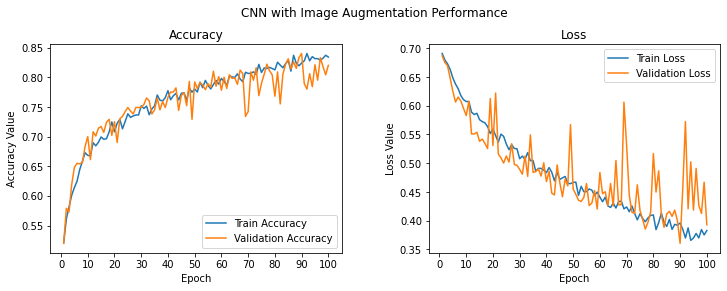

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
________('cats_dogs_cnn_img_aug.h5')

데이터 증식과 드롭아웃 덕택에 더이상 과대적합되지 않습니다. 훈련 곡선이 검증 곡선에 가깝게 따라가고 있습니다. 검증 데이터에서 82% 정확도를 달성하였습니다. 규제하지 않은 모델과 비교했을 때 15% 정도 향상되었습니다.
다른 규제 기법을 더 사용하고 네트워크의 파라미터를 튜닝하면(합성곱 층의 필터 수나 네트워크의 층의 수 등) 86%나 87% 정도까지 더 높은 정확도를 얻을 수도 있습니다. 하지만 데이터가 적기 때문에 컨브넷을 처음부터 훈련해서 더 높은 정확도를 달성하기는 어렵습니다. 이런 상황에서 정확도를 높이기 위한 다음 단계는 사전 훈련된 모델을 사용하는 것입니다.

In [ ]:
!mv 'cats_dogs_cnn_img_aug.h5' '/content/drive/My Drive/lab-model'

# 4. CNN Transfer Learning

### 사전 훈련된 네트워크를 사용하는 두 가지 방법
* **특성 추출** : 특성 추출기로 사전 훈련된 모델 이용
* 미세 조정 (Fine Tuning) : 사전훈련된 모델의 미세 튜닝

### 특성 추출

특성 추출은 사전에 학습된 네트워크의 표현을 사용해 새로운 샘플에서 흥미로운 특성을 뽑아내는 것입니다. 이런 특성을 사용하여 새로운 분류기를 처음부터 훈련합니다.

컨브넷은 이미지 분류를 위해 두 부분으로 구성됩니다. 먼저 연속된 합성곱과 풀링 층으로 시작해서 완전 연결 분류기로 끝납니다. 첫 번째 부분을 모델의 합성곱 기반층(convolutional base)이라고 부르겠습니다. 컨브넷의 경우 특성 추출은 사전에 훈련된 네트워크의 합성곱 기반층을 선택해 새로운 데이터를 통과시키고 그 출력으로 새로운 분류기를 훈련합니다.

In [ ]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files] # for linux
# train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files] # for windows

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files] # for linux
# validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files] # for windows

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [ ]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5])

['cat', 'dog', 'cat', 'cat', 'dog'] [0 1 0 0 1]


### 특성 추출
ImageNet 데이터셋에 훈련된 VGG16 네트워크의 합성곱 기반층을 사용하여 강아지와 고양이 이미지에서 유용한 특성을 추출해 보겠습니다. 그런 다음 이 특성으로 강아지 vs. 고양이 분류기를 훈련합니다.

VGG16 모델은 케라스에 패키지로 포함되어 있습니다. `keras.applications` 모듈에서 임포트할 수 있습니다. `keras.applications` 모듈에서 사용 가능한 이미지 분류 모델은 다음과 같습니다(모두 ImageNet 데이터셋에서 훈련되었습니다):

* Xception
* InceptionV3
* ResNet50
* VGG16
* VGG19
* MobileNet

In [ ]:
if test:
  from tensorflow.keras.applications import ______
  from tensorflow.keras.models import Model
  import tensorflow.keras

  vgg_base = ........
  
  vgg_base.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128

In [ ]:
if test:
  import pandas as pd
  pd.set_option('max_colwidth', -1)

  layers = [ (___________) for layer in _________ ]
  pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
if test:
  print("Trainable layers:", vgg_base.__________)

Trainable layers: [<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32>, <tf.Variable 'block1_conv1/bias:0' shape=(64,) dtype=float32>, <tf.Variable 'block1_conv2/kernel:0' shape=(3, 3, 64, 64) dtype=float32>, <tf.Variable 'block1_conv2/bias:0' shape=(64,) dtype=float32>, <tf.Variable 'block2_conv1/kernel:0' shape=(3, 3, 64, 128) dtype=float32>, <tf.Variable 'block2_conv1/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'block2_conv2/kernel:0' shape=(3, 3, 128, 128) dtype=float32>, <tf.Variable 'block2_conv2/bias:0' shape=(128,) dtype=float32>, <tf.Variable 'block3_conv1/kernel:0' shape=(3, 3, 128, 256) dtype=float32>, <tf.Variable 'block3_conv1/bias:0' shape=(256,) dtype=float32>, <tf.Variable 'block3_conv2/kernel:0' shape=(3, 3, 256, 256) dtype=float32>, <tf.Variable 'block3_conv2/bias:0' shape=(256,) dtype=float32>, <tf.Variable 'block3_conv3/kernel:0' shape=(3, 3, 256, 256) dtype=float32>, <tf.Variable 'block3_conv3/bias:0' shape=(256,) dtype=float32>, <tf.Varia

In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
import tensorflow.keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = .........
output = .........

vgg_model = .......
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = ______

vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f7b0bbf7860>,input_2,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b0bbf7a20>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b0bbf7b38>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7b0bc14898>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b0bc148d0>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b0b3a5438>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7b0b3b4a90>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b0b3beef0>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b0b3c3630>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b0b3d3c88>,block3_conv3,False


In [ ]:
print("Trainable layers:", vgg_model._________)

Trainable layers: []


(1, 4, 4, 512)


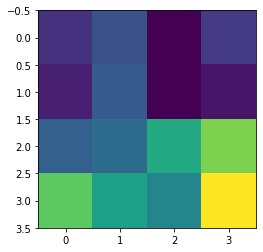

In [ ]:
bottleneck_feature_example = vgg.________(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

### 전이 모델을 위한 특성 추출
* 미리 학습된 VGG16 모델로부터 특성을 추출함
* 최종 특성 맵의 크기는 (4, 4, 512)입니다. 이 특성 위에 완전 연결 층을 놓을 것입니다

In [ ]:
def get_bottleneck_features(model, input_imgs):    
    features = model.predict(input_imgs, verbose=1)
    return features

In [ ]:
train_features_vgg = get_bottleneck_features(_______, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, ____________)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

1000/1000 [==============================] - 5s 5ms/sample
Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [ ]:
if test:
  print(train_features_vgg[0][:5])
  print(validation_features_vgg[0][:5])

[0.19861436 0.         0.         0.         0.7615497 ]
[0.12125432 0.         0.         0.         0.        ]


## Base ConvNet 특성 위에 완전 연결 층을 놓는 두 가지 방식
1. 새로운 데이터셋에서 합성곱 기반층을 실행하고 출력을 넘파이 배열로 디스크에 저장합니다. 그다음 이 데이터를 독립된 완전 연결 분류기에 입력으로 사용합니다. 합성곱 연산은 전체 과정 중에서 가장 비싼 부분입니다. 이 방식은 모든 입력 이미지에 대해 합성곱 기반층을 한 번만 실행하면 되기 때문에 빠르고 비용이 적게 듭니다. 하지만 이런 이유 때문에 이 기법에는 데이터 증식을 사용할 수 없습니다.
2. 준비한 모델(conv_base) 위에 Dense 층을 쌓아 확장합니다. 그다음 입력 데이터에서 엔드 투 엔드로 전체 모델을 실행합니다. 모델에 노출된 모든 입력 이미지가 매번 합성곱 기반층을 통과하기 때문에 데이터 증식을 사용할 수 있습니다. 하지만 이런 이유로 이 방식은 첫 번째 방식보다 훨씬 비용이 많이 듭니다.

### 완전 연결층 방식1 - 전이 모델 설계  
* 완전 연결 분류기를 정의함 (규제를 위해 드롭아웃을 사용합니다)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

input_shape = vgg_model.output_shape[1]

model = .......





model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


### 완전 연결층 방식1 - 전이 모델 학습
* 저장된 데이터와 레이블을 사용해 훈련합니다

In [ ]:
# 1분 정도 소요됨
%%time
history = model.____(x=_________, y=_________,
                    validation_data=(_________, _________),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 1s 443us/sample - loss: 0.4541 - acc: 0.7757 - val_loss: 0.3002 - val_acc: 0.8770
Epoch 2/30
3000/3000 [==============================] - 1s 318us/sample - loss: 0.2976 - acc: 0.8773 - val_loss: 0.3161 - val_acc: 0.8620
Epoch 3/30
3000/3000 [==============================] - 1s 309us/sample - loss: 0.2450 - acc: 0.8943 - val_loss: 0.2580 - val_acc: 0.8940
Epoch 4/30
3000/3000 [==============================] - 1s 306us/sample - loss: 0.1958 - acc: 0.9190 - val_loss: 0.2799 - val_acc: 0.8900
Epoch 5/30
3000/3000 [==============================] - 1s 304us/sample - loss: 0.1747 - acc: 0.9210 - val_loss: 0.2662 - val_acc: 0.9000
Epoch 6/30
3000/3000 [==============================] - 1s 312us/sample - loss: 0.1444 - acc: 0.9430 - val_loss: 0.2775 - val_acc: 0.9010
Epoch 7/30
3000/3000 [==============================] - 1s 304us/sample - loss: 0.1216 - acc: 0.9527 - val_loss: 0.2893 - va

* 훈련 손실과 정확도 곡선을 살펴보자

In [ ]:
model.save('cats_dogs_tlearn_basic_cnn.h5')
!mv 'cats_dogs_tlearn_basic_cnn.h5' '/content/drive/My Drive/lab-model'

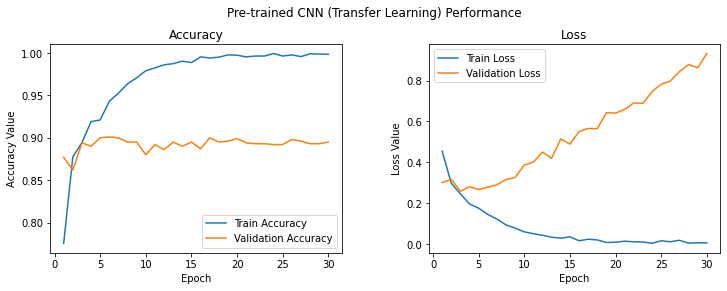

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

### 완전 연결층 방식2 - 데이터 증식 적용 전이 모델 
* 준비한 모델(conv_base) 위에 Dense 층을 쌓아 확장합니다. 그다음 입력 데이터에서 엔드 투 엔드로 전체 모델을 실행합니다. 모델에 노출된 모든 입력 이미지가 매번 합성곱 기반층을 통과하기 때문에 데이터 증식을 사용할 수 있습니다. 하지만 이런 이유로 이 방식은 첫 번째 방식보다 훨씬 비용이 많이 듭니다.
* 이 방법은 훨씬 느리고 비용이 많이 들지만 훈련하는 동안 데이터 증식 기법을 사용할 수 있습니다. `conv_base` 모델을 확장하고 입력 데이터를 사용해 엔드 투 엔드로 실행합니다.
* 이 기법은 연산 비용이 크기 때문에 GPU를 사용할 수 있을 때 시도해야 합니다. CPU에서는 적용하기 매우 힘듭니다. GPU를 사용할 수 없다면 첫 번째 방법을 사용하세요.
* 모델은 층과 동일하게 작동하므로 층을 추가하듯이 `Sequential` 모델에 (`conv_base` 같은) 다른 모델을 추가할 수 있습니다:

데이터 증식 하기

In [ ]:
train_datagen = __________(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = __________(rescale=1./255)

train_generator = __________(train_imgs, train_labels_enc, batch_size=30)
val_generator = __________(validation_imgs, validation_labels_enc, batch_size=20)

In [ ]:
print(train_imgs.shape, validation_imgs.shape)

(3000, 150, 150, 3) (1000, 150, 150, 3)


### 완전 연결층 방식2 - 데이터 증식 전이 모델 설계 

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = ........
model.add(_______)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 8192)              14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 19,172,673
Trainable params: 4,457,985
Non-trainable params: 14,714,688
__________________________________

### 완전 연결층 방식2 - 데이터 증식 전이 모델 학습

In [ ]:
# 45분 정도 소요됨
%%time
history = model._________(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 31s 312ms/step - loss: 0.6535 - acc: 0.6053 - val_loss: 0.5085 - val_acc: 0.8180
Epoch 2/100
100/100 [==============================] - 26s 264ms/step - loss: 0.5691 - acc: 0.7117 - val_loss: 0.4210 - val_acc: 0.8330
Epoch 3/100
100/100 [==============================] - 27s 266ms/step - loss: 0.5109 - acc: 0.7510 - val_loss: 0.3725 - val_acc: 0.8480
Epoch 4/100
100/100 [==============================] - 27s 267ms/step - loss: 0.4783 - acc: 0.7680 - val_loss: 0.3440 - val_acc: 0.8570
Epoch 5/100
100/100 [==============================] - 27s 267ms/step - loss: 0.4484 - acc: 0.7883 - val_loss: 0.3262 - val_acc: 0.8660
Epoch 6/100
100/100 [==============================] - 27s 267ms/step - loss: 0.4385 - acc: 0.7973 - val_loss: 0.3138 - val_acc: 0.8670
Epoch 7/100
100/100 [==============================] - 27s 266ms/step - loss: 0.4310 - acc: 0.8013 - val_loss: 0.3086 - val_acc: 0.8700
Epoch 8/100
100/100 [===========================

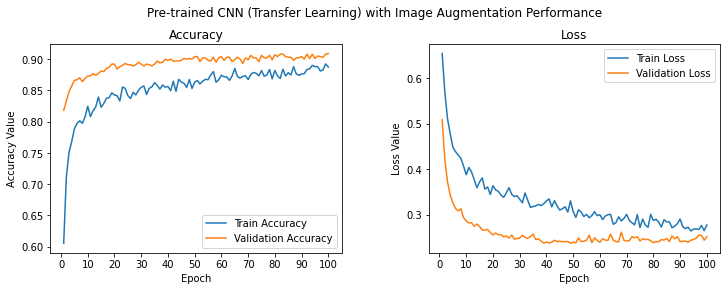

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('cats_dogs_tlearn_img_aug_cnn.h5')

In [ ]:
!mv 'cats_dogs_tlearn_img_aug_cnn.h5' '/content/drive/My Drive/lab-model'

# Fine Tuning 1

### 사전 훈련된 네트워크를 사용하는 두 가지 방법
* 특성 추출 : 특성 추출기로 사전 훈련된 모델 이용
* **미세 조정 (Fine Tuning)** : 사전훈련된 모델의 미세 튜닝

## 미세 조정 (Fine Tuning)
* 모델을 재사용하는 데 널리 사용되는 또 하나의 기법은 특성 추출을 보완하는 미세 조정입니다. 미세 조정은 특성 추출에 사용했던 동결 모델의 상위 층 몇 개를 동결에서 해제하고 모델에 새로 추가한 층(여기서는 완전 연결 분류기)과 함께 훈련하는 것입니다. 주어진 문제에 조금 더 밀접하게 재사용 모델의 표현을 일부 조정하기 때문에 미세 조정이라고 부릅니다.

앞서 랜덤하게 초기화된 상단 분류기를 훈련하기 위해 VGG16의 합성곱 기반층을 동결해야 한다고 말했습니다. 같은 이유로 맨 위에 있는 분류기가 훈련된 후에 합성곱 기반의 상위 층을 미세 조정할 수 있습니다. 분류기가 미리 훈련되지 않으면 훈련되는 동안 너무 큰 오차 신호가 네트워크에 전파됩니다. 이는 미세 조정될 층들이 사전에 학습한 표현들을 망가뜨리게 될 것입니다. 네트워크를 미세 조정하는 단계는 다음과 같습니다:

1. 사전에 훈련된 기반 네트워크 위에 새로운 네트워크를 추가합니다.
2. 기반 네트워크를 동결합니다.
3. 새로 추가한 네트워크를 훈련합니다.
4. 기반 네트워크에서 일부 층의 동결을 해제합니다.
5. 동결을 해제한 층과 새로 추가한 층을 함께 훈련합니다.

## 데이터 준비

In [ ]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files] # for linux
# train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files] # for windows

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files] # for linux
# validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files] # for windows

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [ ]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5])

['cat', 'dog', 'cat', 'cat', 'dog'] [0 1 0 0 1]


## Fine Tuning 1,2,3 단계 실행

In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
import tensorflow.keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = tensorflow.keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [ ]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f7b078e9630>,input_4,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b078f0a20>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b078faef0>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7b6aaa8be0>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6aaa8c18>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6aaa9780>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7b0788fdd8>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b0788fe10>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b07899978>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b078b0fd0>,block3_conv3,False


In [ ]:
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: []


(1, 4, 4, 512)


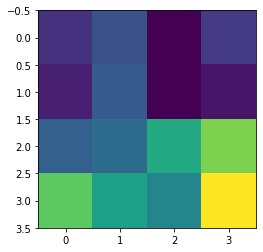

In [ ]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

### 전이 모델을 위한 특성 추출
* 미리 학습된 VGG16 모델로부터 특성을 추출함 : bottleneck features
* 최종 특성 맵의 크기는 (4, 4, 512)입니다.

In [ ]:
def get_bottleneck_features(model, input_imgs):    
    features = model.predict(input_imgs, verbose=1)
    return features

In [ ]:
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

1000/1000 [==============================] - 5s 5ms/sample
Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [ ]:
if test:
  print(train_features_vgg[0][:5])
  print(validation_features_vgg[0][:5])

[0.19861436 0.         0.         0.         0.7615497 ]
[0.12125432 0.         0.         0.         0.        ]


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 30초 정도 소요됨
%%time
history = model._____(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 1s 400us/sample - loss: 0.4314 - acc: 0.7947 - val_loss: 0.3017 - val_acc: 0.8830
Epoch 2/30
3000/3000 [==============================] - 1s 301us/sample - loss: 0.2816 - acc: 0.8790 - val_loss: 0.3244 - val_acc: 0.8600
Epoch 3/30
3000/3000 [==============================] - 1s 302us/sample - loss: 0.2382 - acc: 0.8983 - val_loss: 0.2697 - val_acc: 0.8870
Epoch 4/30
3000/3000 [==============================] - 1s 301us/sample - loss: 0.1983 - acc: 0.9183 - val_loss: 0.2591 - val_acc: 0.9000
Epoch 5/30
3000/3000 [==============================] - 1s 304us/sample - loss: 0.1645 - acc: 0.9343 - val_loss: 0.4356 - val_acc: 0.8400
Epoch 6/30
3000/3000 [==============================] - 1s 301us/sample - loss: 0.1453 - acc: 0.9420 - val_loss: 0.2815 - val_acc: 0.9020
Epoch 7/30
3000/3000 [==============================] - 1s 300us/sample - loss: 0.1212 - acc: 0.9490 - val_loss: 0.2827 - va

## Fine Tuning 4 단계 실행

In [ ]:
vgg_model.trainable = _____

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = _____
    if set_trainable:
        layer.trainable = _____
    else:
        layer.trainable = False
        
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: [<tf.Variable 'block4_conv1_2/kernel:0' shape=(3, 3, 256, 512) dtype=float32>, <tf.Variable 'block4_conv1_2/bias:0' shape=(512,) dtype=float32>, <tf.Variable 'block4_conv2_2/kernel:0' shape=(3, 3, 512, 512) dtype=float32>, <tf.Variable 'block4_conv2_2/bias:0' shape=(512,) dtype=float32>, <tf.Variable 'block4_conv3_2/kernel:0' shape=(3, 3, 512, 512) dtype=float32>, <tf.Variable 'block4_conv3_2/bias:0' shape=(512,) dtype=float32>, <tf.Variable 'block5_conv1_2/kernel:0' shape=(3, 3, 512, 512) dtype=float32>, <tf.Variable 'block5_conv1_2/bias:0' shape=(512,) dtype=float32>, <tf.Variable 'block5_conv2_2/kernel:0' shape=(3, 3, 512, 512) dtype=float32>, <tf.Variable 'block5_conv2_2/bias:0' shape=(512,) dtype=float32>, <tf.Variable 'block5_conv3_2/kernel:0' shape=(3, 3, 512, 512) dtype=float32>, <tf.Variable 'block5_conv3_2/bias:0' shape=(512,) dtype=float32>]


In [ ]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f7b078e9630>,input_4,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b078f0a20>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b078faef0>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7b6aaa8be0>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6aaa8c18>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6aaa9780>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7b0788fdd8>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b0788fe10>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b07899978>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b078b0fd0>,block3_conv3,False


## Fine Tuning 5 단계 실행

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()
model.add(_________)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_9 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 19,172,673
Trainable params: 17,437,185
Non-trainable params: 1,735,488
__________________________________

In [ ]:
# 15분 정도 소요됨
%%time
history = model.____(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 30s 10ms/sample - loss: 0.4374 - acc: 0.7880 - val_loss: 0.2175 - val_acc: 0.9150
Epoch 2/30
3000/3000 [==============================] - 28s 9ms/sample - loss: 0.2224 - acc: 0.9073 - val_loss: 0.1783 - val_acc: 0.9200
Epoch 3/30
3000/3000 [==============================] - 28s 9ms/sample - loss: 0.1452 - acc: 0.9447 - val_loss: 0.1678 - val_acc: 0.9250
Epoch 4/30
3000/3000 [==============================] - 28s 9ms/sample - loss: 0.1092 - acc: 0.9577 - val_loss: 0.1682 - val_acc: 0.9310
Epoch 5/30
3000/3000 [==============================] - 28s 9ms/sample - loss: 0.0749 - acc: 0.9703 - val_loss: 0.1291 - val_acc: 0.9470
Epoch 6/30
3000/3000 [==============================] - 28s 9ms/sample - loss: 0.0517 - acc: 0.9823 - val_loss: 0.1415 - val_acc: 0.9390
Epoch 7/30
3000/3000 [==============================] - 28s 9ms/sample - loss: 0.0334 - acc: 0.9880 - val_loss: 0.1539 - val_acc:

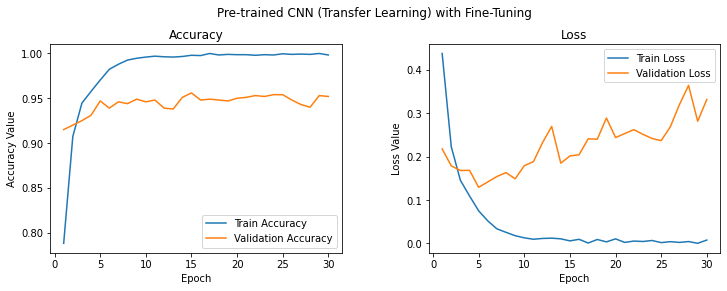

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Fine-Tuning', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('cats_dogs_tlearn_finetune_cnn.h5')

In [ ]:
!mv 'cats_dogs_tlearn_finetune_cnn.h5' '/content/drive/My Drive/lab-model'

# Fine Tuning 2 - Data Augmentation

### 사전 훈련된 네트워크를 사용하는 두 가지 방법
* 특성 추출 : 특성 추출기로 사전 훈련된 모델 이용
* **미세 조정 (Fine Tuning)** : 사전훈련된 모델의 미세 튜닝

## 미세 조정 (Fine Tuning)
* 모델을 재사용하는 데 널리 사용되는 또 하나의 기법은 특성 추출을 보완하는 미세 조정입니다. 미세 조정은 특성 추출에 사용했던 동결 모델의 상위 층 몇 개를 동결에서 해제하고 모델에 새로 추가한 층(여기서는 완전 연결 분류기)과 함께 훈련하는 것입니다. 주어진 문제에 조금 더 밀접하게 재사용 모델의 표현을 일부 조정하기 때문에 미세 조정이라고 부릅니다.

### 네트워크 미세 조정 방법
* 기반 네트워크에서 일부 층의 동결을 해제합니다.
* 동결을 해제한 층과 새로 추가한 층을 함께 훈련합니다.

## 데이터 준비

In [ ]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files] # for linux
# train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files] # for windows
print(train_labels[:3])

['cat', 'dog', 'cat']


In [ ]:
validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files] # for linux
# validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files] # for windows

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [ ]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5])

['cat', 'dog', 'cat', 'cat', 'dog'] [0 1 0 0 1]


## VGG16 네트워크 Fine Tuning 영역 설정

In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
import tensorflow.keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = tensorflow.keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [ ]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f7b6aae9b70>,input_6,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6aae9d30>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6aae9f60>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7b6ab27cf8>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6ab27d30>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6ab89898>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7b6ab92ef0>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6ab92f28>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6ab82a90>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b071aa128>,block3_conv3,False


In [ ]:
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: []


In [ ]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f7b6aae9b70>,input_6,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6aae9d30>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6aae9f60>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7b6ab27cf8>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6ab27d30>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6ab89898>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f7b6ab92ef0>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6ab92f28>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b6ab82a90>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f7b071aa128>,block3_conv3,False


## Fine Tuning with Data Augmentation 모델 설계 & 실행

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = __________(train_imgs, train_labels_enc, batch_size=30)
val_generator = __________(validation_imgs, validation_labels_enc, batch_size=20)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()
model.add(________)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_12 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 19,172,673
Trainable params: 4,457,985
Non-trainable params: 14,714,688
__________________________________

In [ ]:
# 45분 정도 소요됨
%%time
history = model.________(_________, steps_per_epoch=100, epochs=100,
                              validation_data=_________, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 28s 283ms/step - loss: 0.6943 - acc: 0.5477 - val_loss: 0.5908 - val_acc: 0.7590
Epoch 2/100
100/100 [==============================] - 26s 261ms/step - loss: 0.6246 - acc: 0.6540 - val_loss: 0.5174 - val_acc: 0.7970
Epoch 3/100
100/100 [==============================] - 26s 262ms/step - loss: 0.5777 - acc: 0.6983 - val_loss: 0.4647 - val_acc: 0.8180
Epoch 4/100
100/100 [==============================] - 26s 261ms/step - loss: 0.5475 - acc: 0.7290 - val_loss: 0.4291 - val_acc: 0.8240
Epoch 5/100
100/100 [==============================] - 26s 263ms/step - loss: 0.5225 - acc: 0.7393 - val_loss: 0.3988 - val_acc: 0.8360
Epoch 6/100
100/100 [==============================] - 27s 267ms/step - loss: 0.5140 - acc: 0.7460 - val_loss: 0.3762 - val_acc: 0.8490
Epoch 7/100
100/100 [==============================] - 26s 265ms/step - loss: 0.4842 - acc: 0.7697 - val_loss: 0.3601 - val_acc: 0.8550
Epoch 8/100
100/100 [===========================

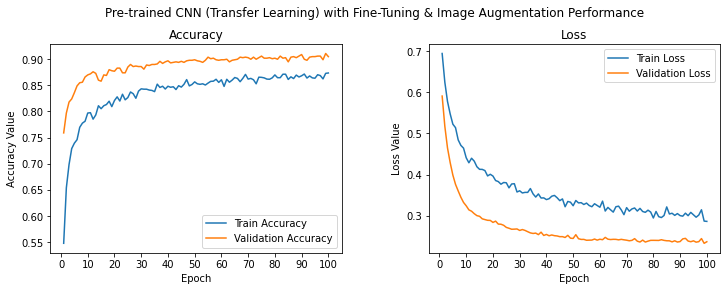

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Fine-Tuning & Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('cats_dogs_tlearn_finetune_img_aug_cnn.h5')

In [ ]:
!mv 'cats_dogs_tlearn_finetune_img_aug_cnn.h5' '/content/drive/My Drive/lab-model'